# CIFAR-10

In [1]:
CIFAR_10 = '../DataSet/cifar-10-batches-py/'

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [3]:
dirs = ['batches.meta','data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4','data_batch_5', 'test_batch']

In [4]:
all_data = [0,1,2,3,4,5,6]

In [5]:
for i,direc in zip(all_data, dirs):
    all_data[i] = unpickle(CIFAR_10+direc)

In [6]:
batch_meta = all_data[0]
data_batch_1 = all_data[1]
data_batch_2 = all_data[2]
data_batch_3 = all_data[3]
data_batch_4 = all_data[4]
data_batch_5 = all_data[5]
test_batch = all_data[6]

batch_meta

In [7]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
X = data_batch_1[b"data"]

In [10]:
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [11]:
X[0].shape

(32, 32, 3)

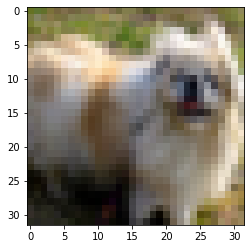

In [12]:
plt.imshow(X[40])

In [13]:
X = data_batch_1[b"data"]

In [14]:
X.shape

(10000, 3072)

In [15]:
all_image = X.reshape(10000, 3, 32, 32)

In [16]:
sample = all_image[0]

In [21]:
sample.transpose(1,2,0).shape

(32, 32, 3)

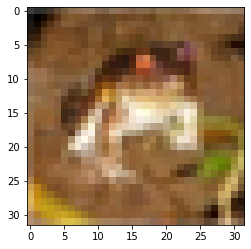

In [24]:
plt.imshow(sample.transpose(1,2,0))

In [23]:
def one_hot_encode(vec,vals=10):
    n = len(vec)
    out = np.zeros([n,vals])
    out[range(n), vec] = 1
    return out

In [ ]:
class CifarHelper():
    
    def __init__():
        self.i = 0
        self.all_train_batches = [data_batch_1,data_batch_2,data_batch_3,data_batch_4,data_batch_5]
        self.test_banch = [test_batch]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
        
    def set_up_images(self):
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)
        
    
